<a href="https://colab.research.google.com/github/8ctal/IA_Course_Talento_Tech/blob/main/MISION_1_TALENTO_TECH_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALENTO TECH**
$$MISION-1$$
Integrantes:


*   Juan Camilo Jaimes Ávila
*   Gabriel Nuñez Rueda
*   Julio cesar diaz uribe
*   Andres Felipe Puentes Carreño




---



# UPLOADING CSV OR NECESSARY FILES

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3_product_sales_dataset.csv to 3_product_sales_dataset (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
df = pd.read_csv('3_product_sales_dataset.csv')
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Product_Category  100 non-null    object 
 2   Season            100 non-null    object 
 3   Promotion         100 non-null    bool   
 4   Units_Sold        100 non-null    int64  
 5   Discount_Rate     100 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 4.1+ KB
None


In [ ]:
print(df.head())
df.columns

         Date Product_Category    Season  Promotion  Units_Sold  Discount_Rate
0  2023-01-01          Belleza     Otoño      False         100           0.00
1  2023-01-02      Electrónica  Invierno      False         156           0.00
2  2023-01-03            Hogar  Invierno      False         149           0.00
3  2023-01-04            Hogar  Invierno      False         132           0.00
4  2023-01-05            Hogar     Otoño       True          55           0.09


Index(['Date', 'Product_Category', 'Season', 'Promotion', 'Units_Sold',
       'Discount_Rate'],
      dtype='object')

# CONVERT ALL COLUMNS TO NUMERIC VALUES

**First we can use dummies and one hot encoding for all columns**

In [ ]:
#Parse date func
def parseDate(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [ ]:
#Df using dummies
def clean_data(df):
    # Step 1: Convert 'Date' column to datetime format
    df = parseDate(df)

    # Step 2: One-Hot Encode 'Product_Category' and 'Season' columns
    df = pd.get_dummies(df, columns=['Product_Category', 'Season'], drop_first=True)

    # Step 3: Ensure 'Promotion' column is a numerical representation (0 and 1)
    df['Promotion'] = df['Promotion'].astype(int)

    # Optional: Reset the index if needed
    df.reset_index(drop=True, inplace=True)

    return df

# Sample usage with the provided DataFrame
# Assuming 'df' is already loaded with your data:
df_cleaned = clean_data(df)
print(df_cleaned.head())

        Date  Promotion  Units_Sold  Discount_Rate  \
0 2023-01-01          0         100           0.00   
1 2023-01-02          0         156           0.00   
2 2023-01-03          0         149           0.00   
3 2023-01-04          0         132           0.00   
4 2023-01-05          1          55           0.09   

   Product_Category_Electrónica  Product_Category_Hogar  \
0                         False                   False   
1                          True                   False   
2                         False                    True   
3                         False                    True   
4                         False                    True   

   Product_Category_Juguetes  Product_Category_Ropa  Season_Otoño  \
0                      False                  False          True   
1                      False                  False         False   
2                      False                  False         False   
3                      False                

1 ) We convert the promotion colum using map True:1 False:0

In [ ]:
df['Promotion'] = df['Promotion'].map({True:1,False:0})
print(df.head())


        Date Product_Category    Season  Promotion  Units_Sold  Discount_Rate
0 2023-01-01          Belleza     Otoño          0         100           0.00
1 2023-01-02      Electrónica  Invierno          0         156           0.00
2 2023-01-03            Hogar  Invierno          0         149           0.00
3 2023-01-04            Hogar  Invierno          0         132           0.00
4 2023-01-05            Hogar     Otoño          1          55           0.09


2 ) Converting the season column using the map  

In [ ]:
df['Season'] = df['Season'].map({"Otoño":0,"Invierno":1,"Primavera":2,"Verano":3})
print(df.head())

        Date Product_Category  Season  Promotion  Units_Sold  Discount_Rate
0 2023-01-01          Belleza       0          0         100           0.00
1 2023-01-02      Electrónica       1          0         156           0.00
2 2023-01-03            Hogar       1          0         149           0.00
3 2023-01-04            Hogar       1          0         132           0.00
4 2023-01-05            Hogar       0          1          55           0.09


3 ) Converting the Product Category column using the map  

In [ ]:
df['Product_Category'] = df['Product_Category'].map({"Belleza":0,"Electrónica":1,"Hogar":2,"Ropa":3,"Juguetes":4})
print(df.head())

        Date  Product_Category  Season  Promotion  Units_Sold  Discount_Rate
0 2023-01-01                 0       0          0         100           0.00
1 2023-01-02                 1       1          0         156           0.00
2 2023-01-03                 2       1          0         149           0.00
3 2023-01-04                 2       1          0         132           0.00
4 2023-01-05                 2       0          1          55           0.09


In [ ]:

df = parseDate(df)
print(df.head())

        Date  Product_Category  Season  Promotion  Units_Sold  Discount_Rate
0 2023-01-01                 0       0          0         100           0.00
1 2023-01-02                 1       1          0         156           0.00
2 2023-01-03                 2       1          0         149           0.00
3 2023-01-04                 2       1          0         132           0.00
4 2023-01-05                 2       0          1          55           0.09


In [ ]:
#Using year info func
def yearInfo(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    return df

df = yearInfo(df)
print(df.head())

        Date  Product_Category  Season  Promotion  Units_Sold  Discount_Rate  \
0 2023-01-01                 0       0          0         100           0.00   
1 2023-01-02                 1       1          0         156           0.00   
2 2023-01-03                 2       1          0         149           0.00   
3 2023-01-04                 2       1          0         132           0.00   
4 2023-01-05                 2       0          1          55           0.09   

   Year  Month  Day  
0  2023      1    1  
1  2023      1    2  
2  2023      1    3  
3  2023      1    4  
4  2023      1    5  


# SPLIT DATAFRAME ONTO TRAINING AND TESTING SETS

In [ ]:
x = df.drop(columns=["Date"])  # All columns except 'Date'
y = df["Units_Sold"]  # Column 'Units_Sold'
#Split df onto training and testing x & y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train)
print(y_train)

(80, 8)
(80,)
(20, 8)
(20,)
    Product_Category  Season  Promotion  Units_Sold  Discount_Rate  Year  \
55                 3       2          0         114           0.00  2023   
88                 0       0          0          25           0.00  2023   
26                 1       1          0          64           0.00  2023   
42                 4       2          1          61           0.30  2023   
69                 0       1          1          78           0.22  2023   
..               ...     ...        ...         ...            ...   ...   
60                 4       0          0         111           0.00  2023   
71                 0       1          1         140           0.16  2023   
14                 1       1          0          55           0.00  2023   
92                 4       3          1          24           0.09  2023   
51                 4       1          0          83           0.00  2023   

    Month  Day  
55      2   25  
88      3   30  
26      

# TRAIN & FIT MODEL

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Lista de modelos a evaluar
models = {
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Entrenamiento y evaluación de cada modelo
for model_name, model in models.items():
    print(f"\nModelo: {model_name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Mostrar resultados
    print("X_test:", x_test)
    print("y_test:", y_test.tolist())
    print("y_pred:", y_pred.tolist())


Modelo: Naive Bayes
X_test:     Product_Category  Season  Promotion  Units_Sold  Discount_Rate  Year  \
83                 2       0          0         142           0.00  2023   
53                 1       2          0         126           0.00  2023   
70                 0       3          1         101           0.25  2023   
45                 0       2          0         169           0.00  2023   
44                 1       0          0         194           0.00  2023   
39                 2       1          0          63           0.00  2023   
22                 2       3          0          22           0.00  2023   
80                 1       2          0          40           0.00  2023   
10                 1       1          1         196           0.10  2023   
0                  0       0          0         100           0.00  2023   
18                 3       1          0          53           0.00  2023   
30                 2       1          1         111        

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MÉTRICAS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {}

# Iterar sobre cada modelo
for model_name, model in models.items():
    # Predecir con el modelo
    y_pred = model.predict(x_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)


    # Guardar métricas en el diccionario
    metrics[model_name] = {
        "Accuracy": accuracy,

    }

# Mostrar las métricas de cada modelo
for model_name, metric_values in metrics.items():
    print(f"\nModelo: {model_name}")
    for metric, value in metric_values.items():
        print(f"{metric}: {value:.4f}")


Modelo: Naive Bayes
Accuracy: 0.0500

Modelo: K-Nearest Neighbors
Accuracy: 0.0500

Modelo: Logistic Regression
Accuracy: 0.0500

Modelo: Decision Tree
Accuracy: 0.1000


# Sales database graphs by season

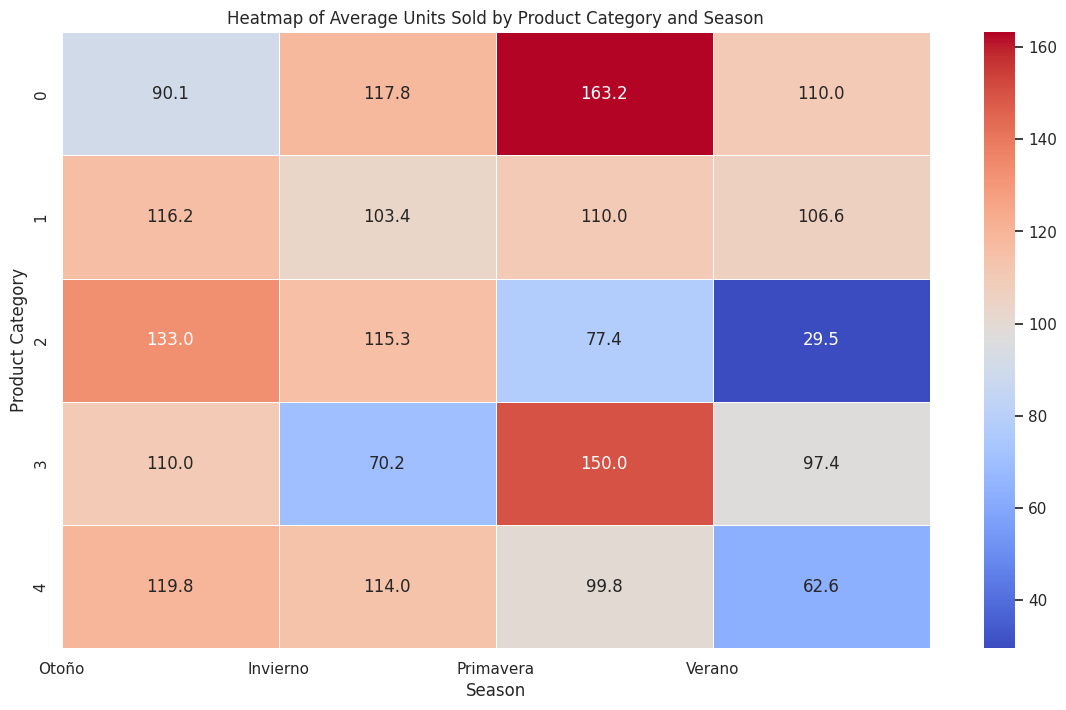

<ipython-input-14-8cd503d89ae5>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Units_Sold', data=df, ci=None)


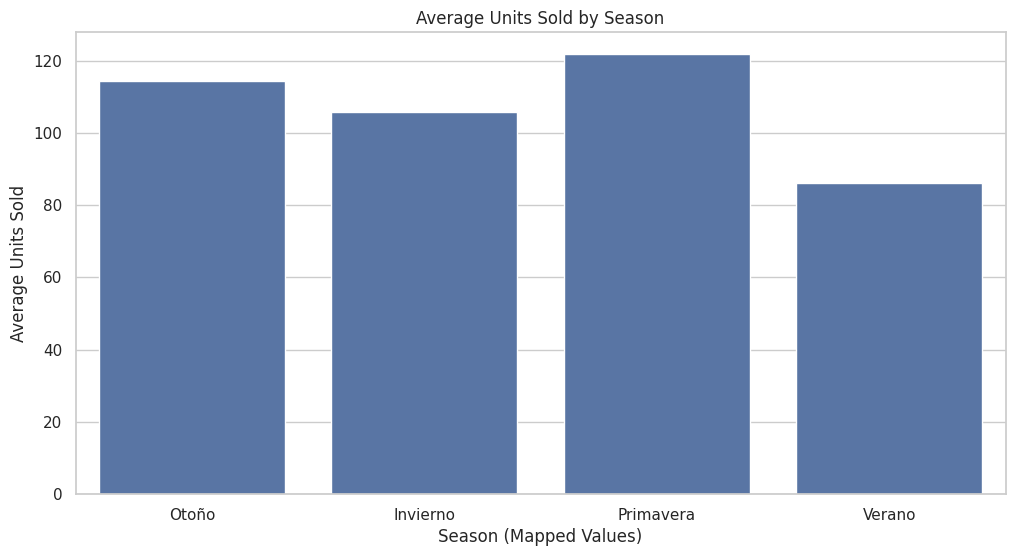

<ipython-input-14-8cd503d89ae5>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promotion', y='Units_Sold', data=df, ci=None)


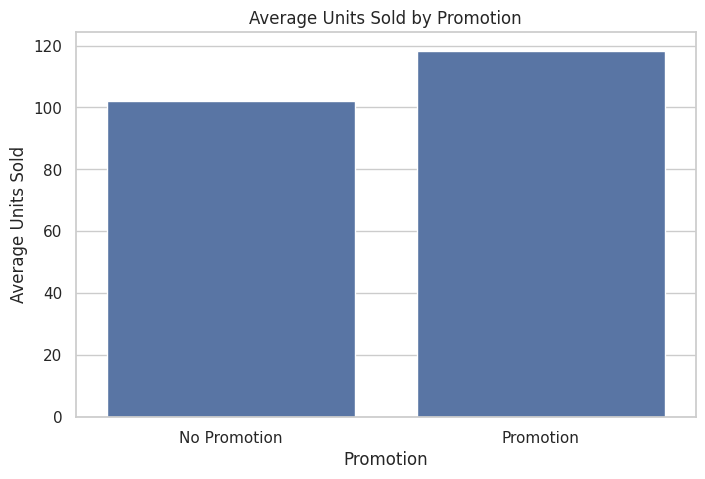

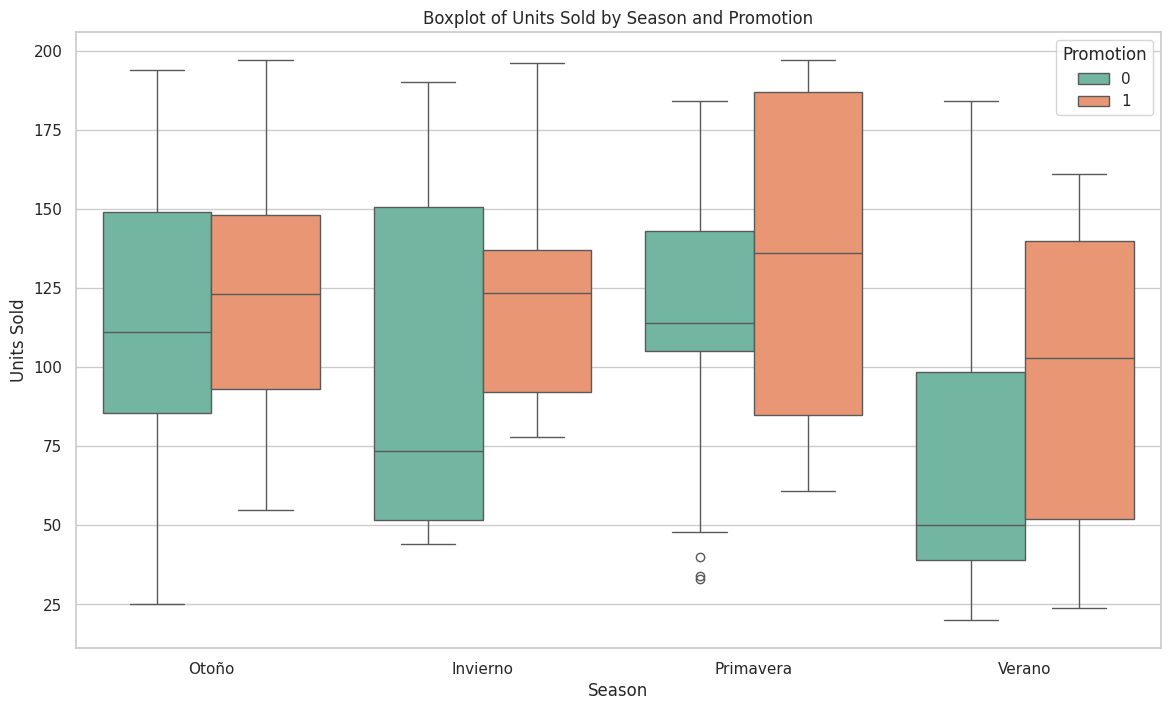

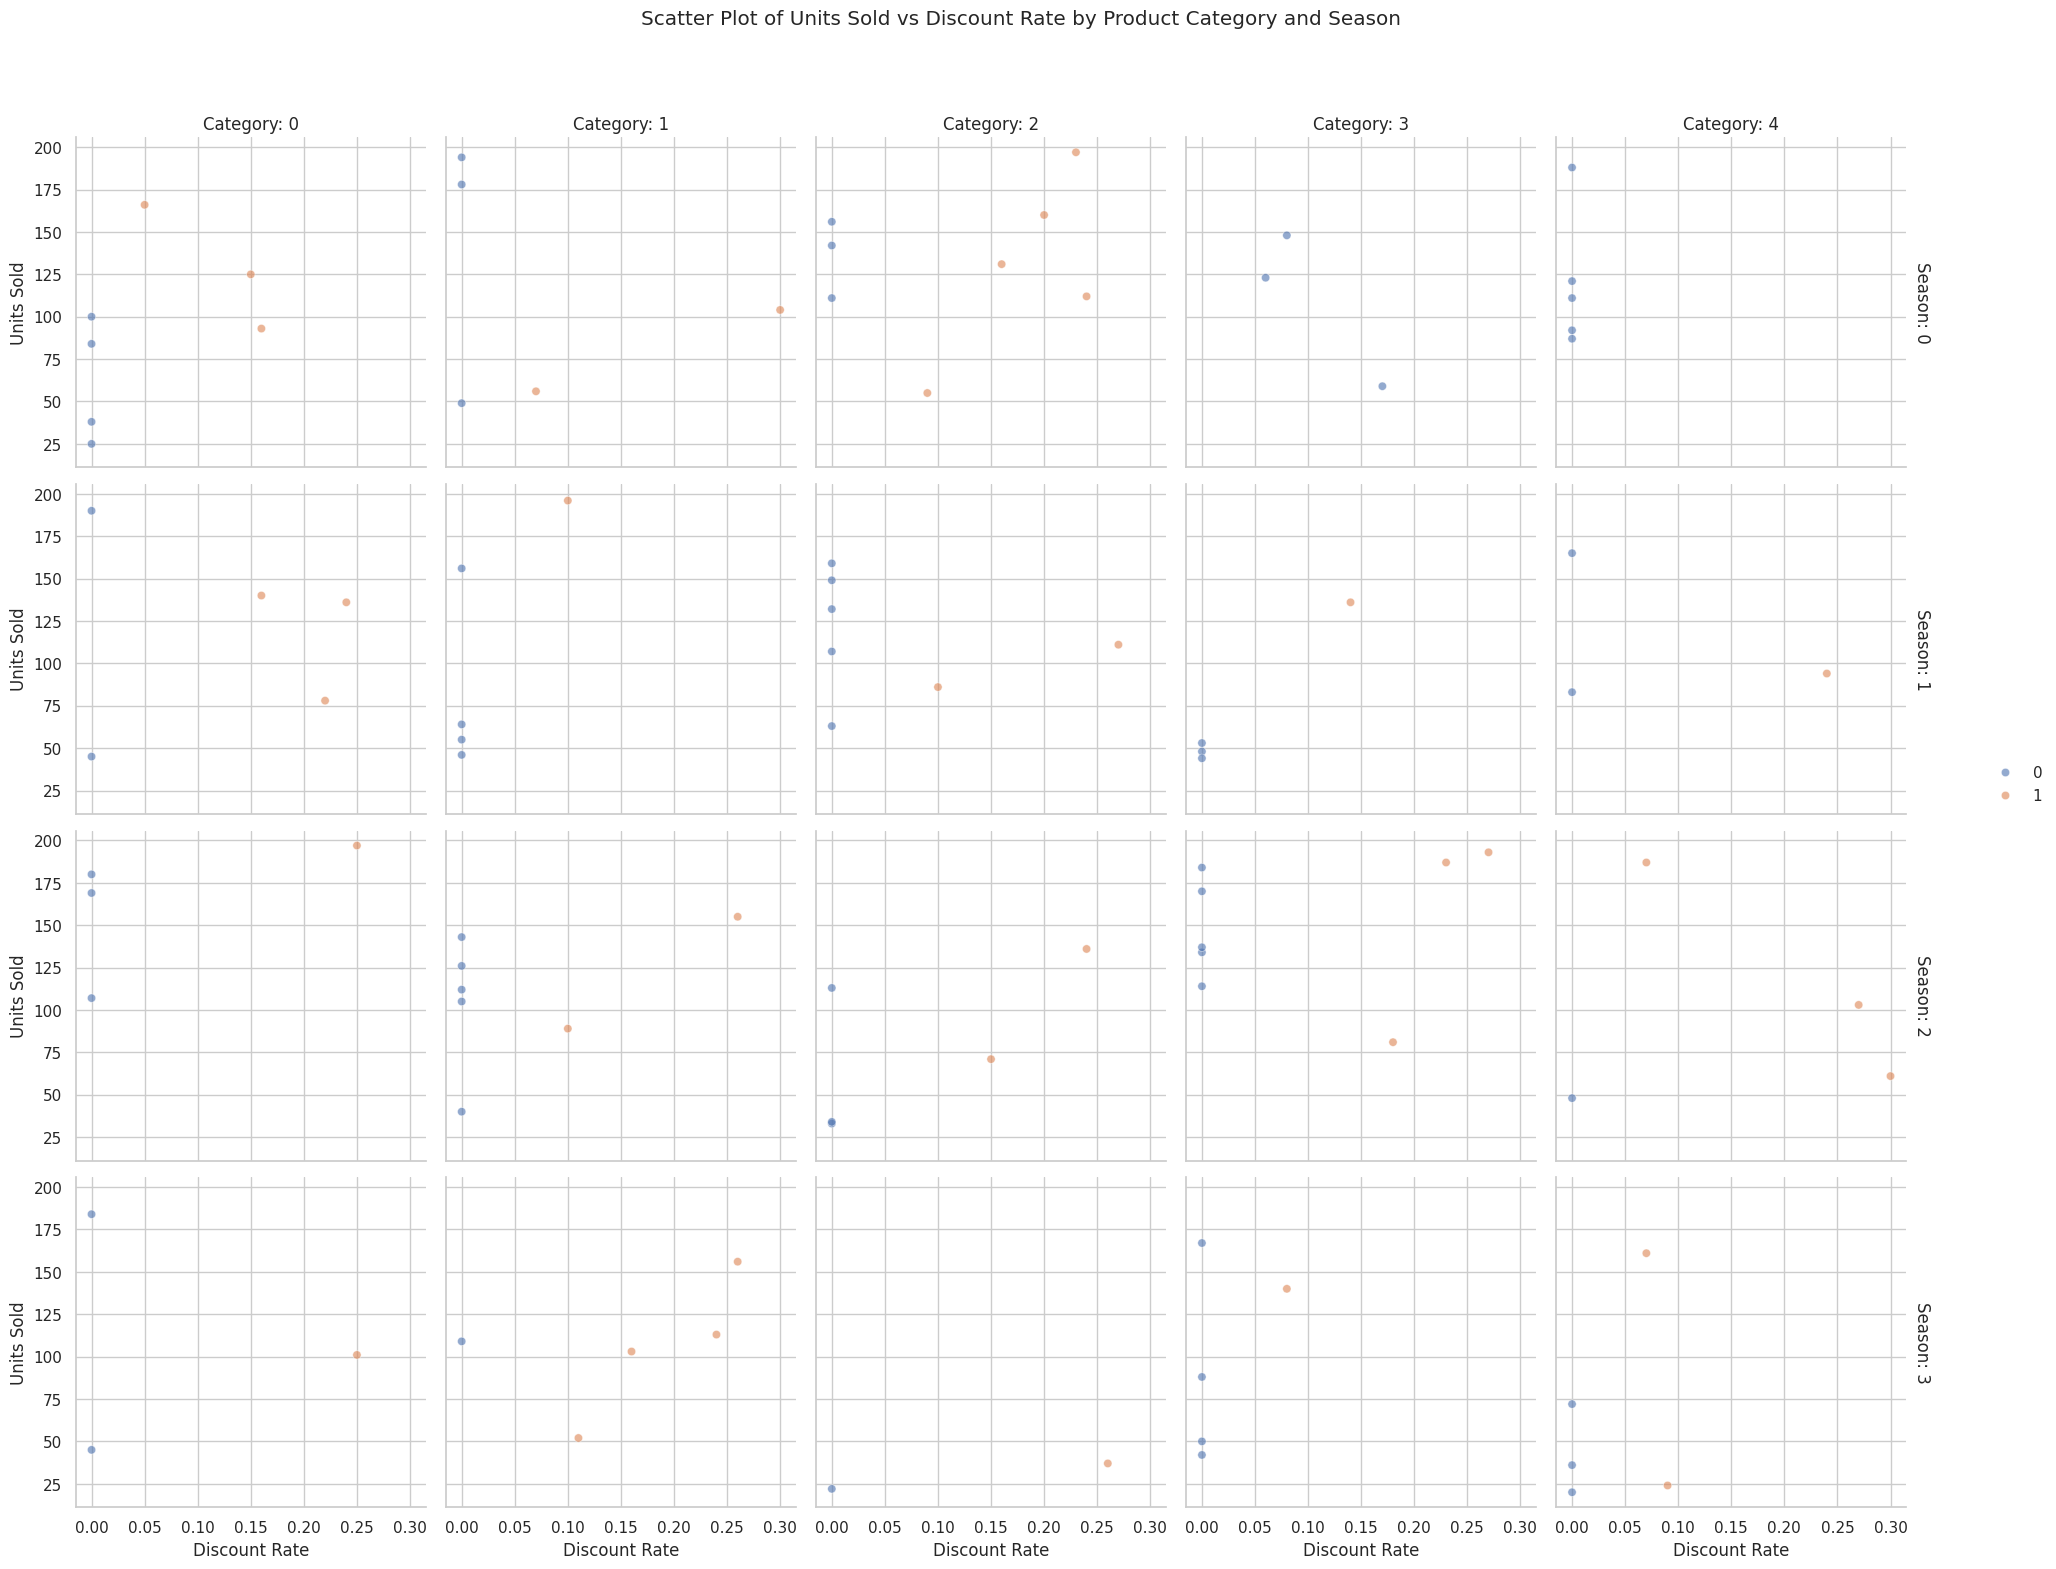

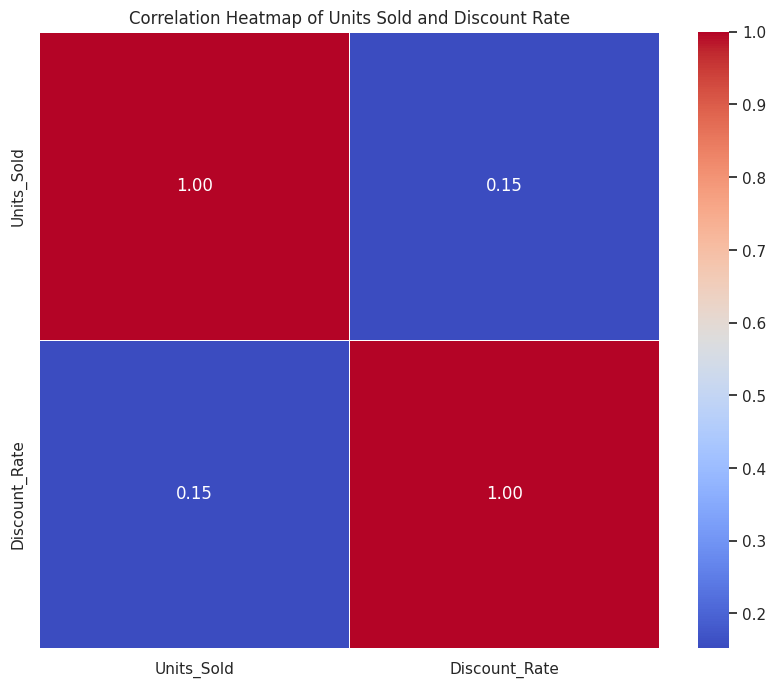

In [ ]:
sns.set(style="whitegrid")

# 1. Heatmap of average units sold by Product Category and Season
plt.figure(figsize=(14, 8))
pivot_table = df.pivot_table(values='Units_Sold', index='Product_Category', columns='Season', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Average Units Sold by Product Category and Season')
plt.xlabel('Season')
plt.ylabel('Product Category')
plt.xticks(ticks=range(4), labels=["Otoño", "Invierno", "Primavera", "Verano"])
plt.show()

# Plot 2: Units Sold by Season with season labels
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Units_Sold', data=df, ci=None)
plt.title('Average Units Sold by Season')
plt.xlabel('Season (Mapped Values)')
plt.ylabel('Average Units Sold')
plt.xticks(ticks=range(4), labels=["Otoño", "Invierno", "Primavera", "Verano"])
plt.show()

# Plot 3: Units Sold by Promotion with labels
plt.figure(figsize=(8, 5))
sns.barplot(x='Promotion', y='Units_Sold', data=df, ci=None)
plt.title('Average Units Sold by Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Units Sold')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'])
plt.show()

# 4. Boxplot with hue to understand units sold by season and promotion
plt.figure(figsize=(14, 8))
sns.boxplot(x='Season', y='Units_Sold', hue='Promotion', data=df, palette='Set2')
plt.title('Boxplot of Units Sold by Season and Promotion')
plt.xlabel('Season')
plt.ylabel('Units Sold')
plt.xticks(ticks=range(4), labels=["Otoño", "Invierno", "Primavera", "Verano"])
plt.show()

# 5. FacetGrid for detailed comparison by Product Category and Season
g = sns.FacetGrid(df, col='Product_Category', row='Season', margin_titles=True, height=4)
g.map_dataframe(sns.scatterplot, x='Discount_Rate', y='Units_Sold', hue='Promotion', alpha=0.6)
g.add_legend()
g.set_axis_labels('Discount Rate', 'Units Sold')
g.set_titles(col_template='Category: {col_name}', row_template='Season: {row_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of Units Sold vs Discount Rate by Product Category and Season')
plt.show()

# 6. Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Units_Sold', 'Discount_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Units Sold and Discount Rate')
plt.show()